In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para gráficos
import os

In [12]:
#=== importacion de datos ===#

# Obtén la ruta absoluta del arhivo actual
current_dir = os.getcwd() 
path_datasets = os.path.join(current_dir,"datasets/Base_celulares.xlsx")

#Construimos el dataframe
df = pd.read_excel(path_datasets)
df

,Apell_Nom,Edad,Sexo,Marca_celu,Modelo,Precio,Satisfacc,Notebook,Tablet,Ingreso,casado_unido,N_Hijos,Alquila,Nivel_Edu
0,Carmen Vega,37,0,Huawei,QI8U8350-51,2000.0,8,0,0,7000,1.0,2.0,0.0,Secundario
1,Carmen Vega,30,0,Samsung,GALAXI S4 MINI,5000.0,10,0,1,15000,0.0,1.0,1.0,Terciario
2,Ezequiel Velazco,24,1,Nokia,c3,1300.0,7,1,0,5000,0.0,0.0,0.0,Universitario
3,Ezequiel Velazco,28,1,Samsung,s4 mini,5000.0,10,1,1,13000,1.0,0.0,0.0,Posgrado
4,Ezequiel Velazco,24,1,Samsung,s4 mini,5000.0,9,1,0,0,1.0,1.0,1.0,Secundario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,María José González Gervasoni,55,1,Nokia,C3,1299.0,7,1,0,15000,1.0,0.0,0.0,Universitario
193,Bartlett mariana ines,63,1,Nokia,C2-01,50.0,8,1,0,15000,1.0,0.0,1.0,Universitario
194,Bartlett mariana ines,60,1,Sony Ericson,WT19a,1500.0,8,1,0,11000,1.0,0.0,1.0,Universitario
195,Bartlett mariana ines,40,1,Samsung,GT 19300,3000.0,10,1,1,10000,1.0,2.0,1.0,Universitario


<h3> Nivel de sastifaccion </h3>

En esta seccion vamos a estudiar la distribucion que presenta la sastifaccion del dispositivo

In [13]:
#Creamos DF
tabla_sastifaccion = pd.DataFrame()

#Variable de estudio, generalmente llamada V.A X
tabla_sastifaccion['X'] = df['Satisfacc'].value_counts().index

#Frecuencia de cada valor de la variable
tabla_sastifaccion['frecuencia'] = df['Satisfacc'].value_counts().values


#Frecuencia relativa de cada valor
tabla_sastifaccion['frec_relativa'] = df['Satisfacc'].value_counts(normalize=True).values #El parametro normalize calcula la frecuencia relativa de forma automatica
tabla_sastifaccion['frec_acum'] = tabla_sastifaccion['frec_relativa'].cumsum()

#Ordenamos los datos de forma ordinal por X
tabla_sastifaccion = tabla_sastifaccion.sort_values('X')

tabla_sastifaccion

,X,frecuencia,frec_relativa,frec_acum
7,2,1,0.005076,1.000000
6,4,4,0.020305,0.994924
5,5,9,0.045685,0.974619
3,6,20,0.101523,0.842640
1,7,46,0.233503,0.573604
0,8,67,0.340102,0.340102
2,9,33,0.167513,0.741117
4,10,17,0.086294,0.928934


Creamos un grafico de la probabilidad, y uno de la densidad

* Probabilidad: Se grafica la frencuencia relativa
* Densidad: Se ajustan los datos para que sumen 1. Cada barra representa la cantidad de datos de una categoria, en formato normalizado.

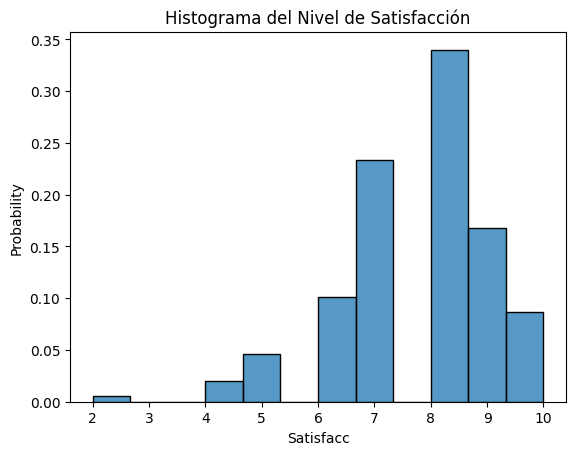

Text(0.5, 1.0, 'Histograma del Nivel de Satisfacción')

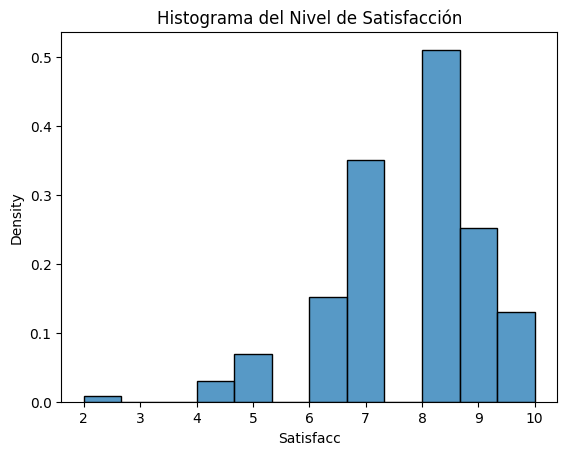

In [14]:
sns.histplot(df['Satisfacc'], stat = "probability").set_title("Histograma del Nivel de Satisfacción")
plt.show()
sns.histplot(df['Satisfacc'], stat = "density").set_title("Histograma del Nivel de Satisfacción")

<p> Estudio de los Salarios </p>

Vamos a estudiar la distribucion de los salarios

In [15]:
tabla_ingresos = pd.DataFrame() #df de datos

#Vamos a usar la estrategia de maximos y minimos, con espacios equidistintastes.
max = df['Ingreso'].max()
min = df['Ingreso'].min()
intervalos = np.linspace(min,max,num = 10 + 1)  #creamos 10 intervalos
frecuencias = pd.cut(x = df['Ingreso'],bins = intervalos,include_lowest=True)

tabla_ingresos['frecuencia_abs'] = frecuencias.value_counts().sort_index()
tabla_ingresos['frecuencia_acum'] = tabla_ingresos['frecuencia_abs'].cumsum()

#Establecemos frecuencias relativa y acumulada
tabla_ingresos['frencuencia_relativa'] = frecuencias.value_counts(normalize=True).sort_index().values
tabla_ingresos['frencuencia_rel_acum'] = tabla_ingresos['frencuencia_relativa'].cumsum()

tabla_ingresos

,frecuencia_abs,frecuencia_acum,frencuencia_relativa,frencuencia_rel_acum
Ingreso,,,,
"(-0.001, 4500.0]",28,28,0.142132,0.142132
"(4500.0, 9000.0]",83,111,0.421320,0.563452
"(9000.0, 13500.0]",41,152,0.208122,0.771574
"(13500.0, 18000.0]",24,176,0.121827,0.893401
"(18000.0, 22500.0]",9,185,0.045685,0.939086
"(22500.0, 27000.0]",7,192,0.035533,0.974619
"(27000.0, 31500.0]",2,194,0.010152,0.984772
"(31500.0, 36000.0]",2,196,0.010152,0.994924
"(36000.0, 40500.0]",0,196,0.000000,0.994924


Graficamos la frecuencia relativa para conocer la probabilidad de cada caso.

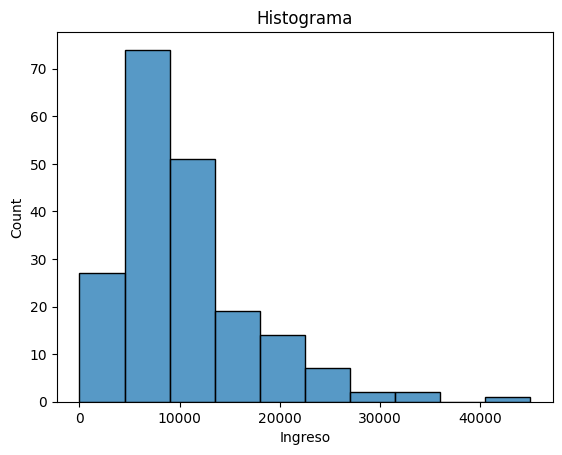

In [16]:
sns.histplot(df['Ingreso'],bins=intervalos)
plt.title("Histograma")
plt.show()

<H4> Comparativa de dispersion, usando el coeficiente de variacion </H4>

Con este estadistico medimos que dato presenta mas dispersion respecto a su media

In [17]:
#Calculamos las medias
media_sastifaccion = df['Satisfacc'].mean()
media_ingreso = df['Ingreso'].mean()

#Calculamos los desvios
desvio_sastifaccion = df['Satisfacc'].std()
desvio_ingreso = df['Ingreso'].std()

#Calculamos los coeficientes de variacion - y los pasamos a porcentajes
coef_sastifaccion = (desvio_sastifaccion / media_sastifaccion) * 100
coef_ingreso = (desvio_ingreso /media_ingreso ) * 100

print(f"Coef. de Var de sastifaccion: {coef_sastifaccion:.2f} || Coef. de Var de ingreso: {coef_ingreso:.2f}")

Coef. de Var de sastifaccion: 18.30 || Coef. de Var de ingreso: 69.62


/home/gaston/Escritorio/env_diplomatura/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Ingreso', ylabel='Count'>

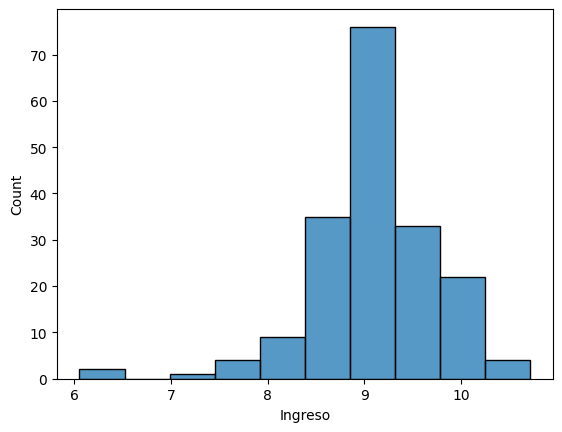

In [20]:
#APlicacion de log. 
salario_log = np.log(df['Ingreso'])

sns.histplot(salario_log,bins=10)
